# WeatherPy

**Analysis**

    • As expected, the temperature appears to be higher closer to the equator (latitude = 0).
    
    • Latitude seems to have little effect on humidity (discounting the one obvious unreasonable outlier in my particular
        data), cloudiness, or wind speed.
    
    • Variables unaccounted for in this analysis include the time of year (seasons -- and therefore, weather conditions --
        will cause variability over the entire year) and the greater land mass in the northern over the southern
        hemispheres (https://www.theguardian.com/notesandqueries/query/0,,-200791,00.html) likely resulting in more data
        points in positive latitudes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from config import owmkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

## Perform API Calls

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={owmkey}&units={units}&q="

# set up lists to hold reponse info
my_city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# set up iterator counter
rec_num = 0

# get date of data retrieval
date_retrieved = datetime.date.today()

# loop through cities to retrieve weather data
for a_city in cities:
    rec_num += 1
    response = requests.get(query_url + a_city).json()
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        my_city.append(a_city)
        print(f"Processing Record {rec_num} | {a_city}")
    except:
        print("City not found. Skipping...")

City not found. Skipping...
Processing Record 2 | saint anthony
Processing Record 3 | avarua
City not found. Skipping...
Processing Record 5 | tuktoyaktuk
Processing Record 6 | punta arenas
Processing Record 7 | upernavik
Processing Record 8 | kindu
Processing Record 9 | clyde river
Processing Record 10 | hermanus
Processing Record 11 | busselton
Processing Record 12 | norman wells
Processing Record 13 | pa daet
City not found. Skipping...
Processing Record 15 | payo
Processing Record 16 | iqaluit
Processing Record 17 | tiarei
Processing Record 18 | bandarbeyla
City not found. Skipping...
Processing Record 20 | itarema
Processing Record 21 | vaini
Processing Record 22 | souillac
Processing Record 23 | victoria
Processing Record 24 | puerto ayora
Processing Record 25 | rikitea
Processing Record 26 | ixtapa
Processing Record 27 | khatanga
Processing Record 28 | bredasdorp
Processing Record 29 | port hedland
Processing Record 30 | mogadishu
Processing Record 31 | inuvik
Processing Record 

Processing Record 254 | lasa
Processing Record 255 | mao
Processing Record 256 | ardatov
Processing Record 257 | coquimbo
Processing Record 258 | huarmey
Processing Record 259 | huntington
Processing Record 260 | gat
Processing Record 261 | samarai
Processing Record 262 | nizhniy kuranakh
Processing Record 263 | lowestoft
Processing Record 264 | belyy yar
Processing Record 265 | thompson
Processing Record 266 | gacko
Processing Record 267 | springbok
Processing Record 268 | mossendjo
Processing Record 269 | lata
Processing Record 270 | el rusio
City not found. Skipping...
Processing Record 272 | hobyo
Processing Record 273 | yerofey pavlovich
Processing Record 274 | barraute
Processing Record 275 | esperance
Processing Record 276 | preston
Processing Record 277 | syracuse
Processing Record 278 | ancud
Processing Record 279 | nador
Processing Record 280 | mbaiki
Processing Record 281 | tavda
Processing Record 282 | nizhniy tsasuchey
Processing Record 283 | pacific grove
Processing Recor

Processing Record 506 | ermelo
Processing Record 507 | nouadhibou
Processing Record 508 | billings
Processing Record 509 | basco
Processing Record 510 | campoverde
Processing Record 511 | puerto escondido
Processing Record 512 | viedma
Processing Record 513 | daru
Processing Record 514 | namie
Processing Record 515 | kapit
Processing Record 516 | talnakh
Processing Record 517 | karachi
Processing Record 518 | paragominas
Processing Record 519 | narsaq
Processing Record 520 | arlit
Processing Record 521 | talakan
Processing Record 522 | mahebourg
Processing Record 523 | acajutla
Processing Record 524 | awbari
Processing Record 525 | evensk
Processing Record 526 | mudbidri
Processing Record 527 | gagino
Processing Record 528 | murgab
Processing Record 529 | penticton
Processing Record 530 | alnashi
Processing Record 531 | haapiti
Processing Record 532 | hervey bay
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 536 | san quintin
Proce

In [4]:
# put data into dictionary
weather_dict = {
    "City": my_city,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# convert to dataframe
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,saint anthony,90,US,1554672349,57,43.97,-111.68,53.01,23.04
1,avarua,32,CK,1554670800,74,-21.21,-159.78,82.40,17.22
2,tuktoyaktuk,90,CA,1554670800,78,69.44,-133.03,8.60,9.17
3,punta arenas,75,CL,1554670949,61,-53.16,-70.91,46.40,10.29
4,upernavik,20,GL,1554672548,83,72.79,-56.15,36.16,19.95


In [5]:
# export dataframe to csv
weather_data.to_csv(path_or_buf = output_data_file, index = False)

## Latitude vs Temperature Plot

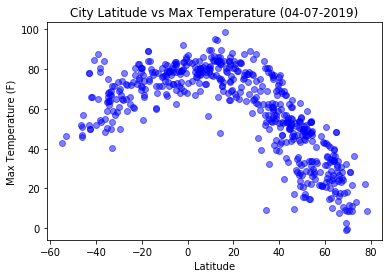

In [7]:
# plot latitude vs. temperature
x = weather_data["Latitude"]
y = weather_data["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (F)"
date_string = date_retrieved.strftime('%m-%d-%Y')
title = "City Latitude vs Max Temperature (" + date_string + ")"

plt.scatter(x, y, c="blue", alpha=0.5)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.savefig('./images/lat_temp.png')
plt.show()

## Latitude vs Humidity Plot

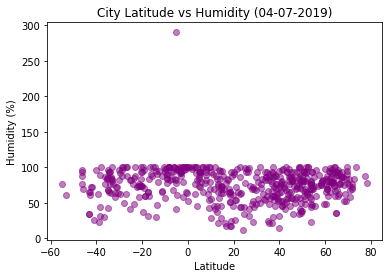

In [8]:
# plot latitude vs. humidity
x = weather_data["Latitude"]
y = weather_data["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
date_string = date_retrieved.strftime('%m-%d-%Y')
title = "City Latitude vs Humidity (" + date_string + ")"

plt.scatter(x, y, c="purple", alpha=0.5)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.savefig('./images/lat_hum.png')
plt.show()

## Latitude vs Cloudiness Plot

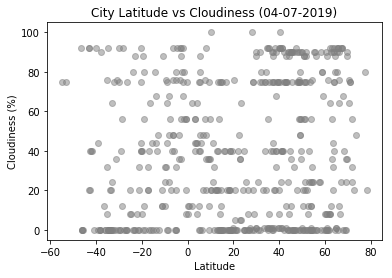

In [9]:
# plot latitude vs. cloudiness
x = weather_data["Latitude"]
y = weather_data["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
date_string = date_retrieved.strftime('%m-%d-%Y')
title = "City Latitude vs Cloudiness (" + date_string + ")"

plt.scatter(x, y, c="gray", alpha=0.5)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.savefig('./images/lat_cld.png')
plt.show()

## Latitude vs Wind Speed Plot

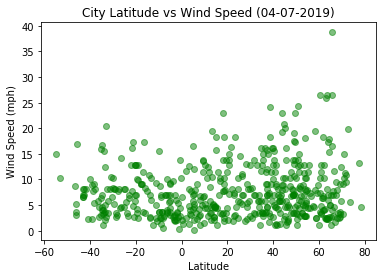

In [10]:
# plot latitude vs. wind speed
x = weather_data["Latitude"]
y = weather_data["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
date_string = date_retrieved.strftime('%m-%d-%Y')
title = "City Latitude vs Wind Speed (" + date_string + ")"

plt.scatter(x, y, c="green", alpha=0.5)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.savefig('./images/lat_wind.png')
plt.show()